<a href="https://colab.research.google.com/github/dutta-arka/Transit-Detect/blob/main/TIC_9967949_1_Vet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install triceratops

In [ ]:
!pip install lightkurve

In [3]:
import numpy as np
import pandas as pd
import time
import lightkurve as lk
from lightkurve import TessLightCurve
import matplotlib.pyplot as plt
%matplotlib inline

import triceratops.triceratops as tr

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
# .csv file is directly from SHERLOCKPIPE out product
# lc_0.csv is made for slected sectors or specifically made for this one
data = pd.read_csv("lc_0.csv")

# Extract the values from each column
x = data.iloc[:, 0]
y = data.iloc[:, 1]
error = data.iloc[:, 2]

# LightCurve object
lc = lk.LightCurve(time=x, flux=y, flux_err=error).bin(time_bin_size=0.007)
lc = lc.remove_nans()

# Perform phase folding around the given epoch
tic_id = 9967949
period = 24.2796649950519  # Orbital period in days
epoch = 1413.04825293384
folded_lc = lc.fold(period=period, epoch_time=epoch)
folded_lc = folded_lc[folded_lc.time < 1.0]
folded_lc = folded_lc[folded_lc.time > -1.0]

# Plot the data with error bars
# plt.errorbar(x, y, fmt='o', markersize=3, capsize=2)

# # Plot a dotted line connecting the y-values
# plt.plot(x, y, linestyle=':', color='black')

# plt.xlabel('X')
# plt.ylabel('Y')
# plt.title('Folded light curve')
# plt.gcf().set_size_inches(15, 8)
# plt.grid(True)
# plt.show()

# Create a DataFrame with the required columns
folded_data = pd.DataFrame({
    'Time': folded_lc.time.value,  # Convert time to array
    'Flux': folded_lc.flux.value,  # Convert flux to array
    'Flux Error': folded_lc.flux_err.value  # Convert flux error to array
})

# Save the phase-folded light curve to a CSV file without column headers
output_filename = f"TIC_{tic_id}_all_sector_lightcurve.csv"
folded_data.to_csv(output_filename, index=False, header=False)

print(f"Phase-folded light curve saved to: {output_filename}")

Phase-folded light curve saved to: TIC_9967949_all_sector_lightcurve.csv


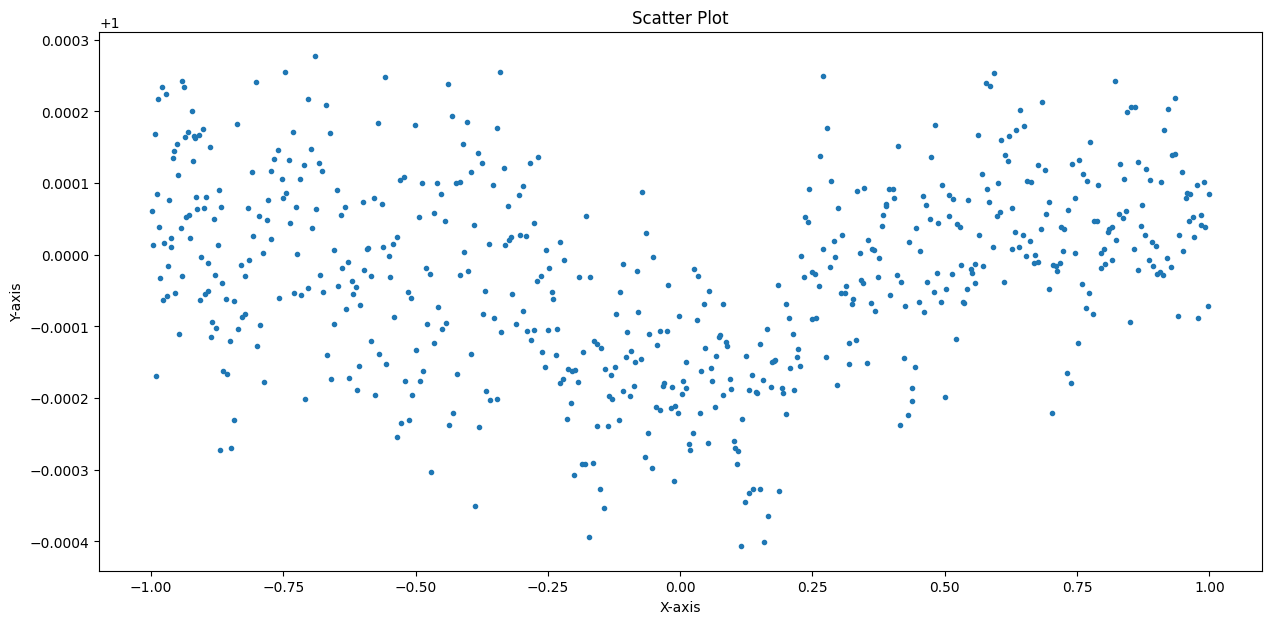

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
data = pd.read_csv(f'TIC_{tic_id}_all_sector_lightcurve.csv')

# Extract the x and y values from the dataset
x = data.iloc[:, 0]  # Assuming the first column is the x-axis
y = data.iloc[:, 1]  # Assuming the second column is the y-axis

# Set the figure size
plt.figure(figsize=(15, 7))

# Create a scatter plot
plt.scatter(x, y, marker='.')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot')

# Show the plot
plt.show()

In [42]:
ID = tic_id
sectors = np.array([4, 31])
target = tr.target(ID=ID, sectors=sectors, search_radius=8) # target radius shorted

Sector 4


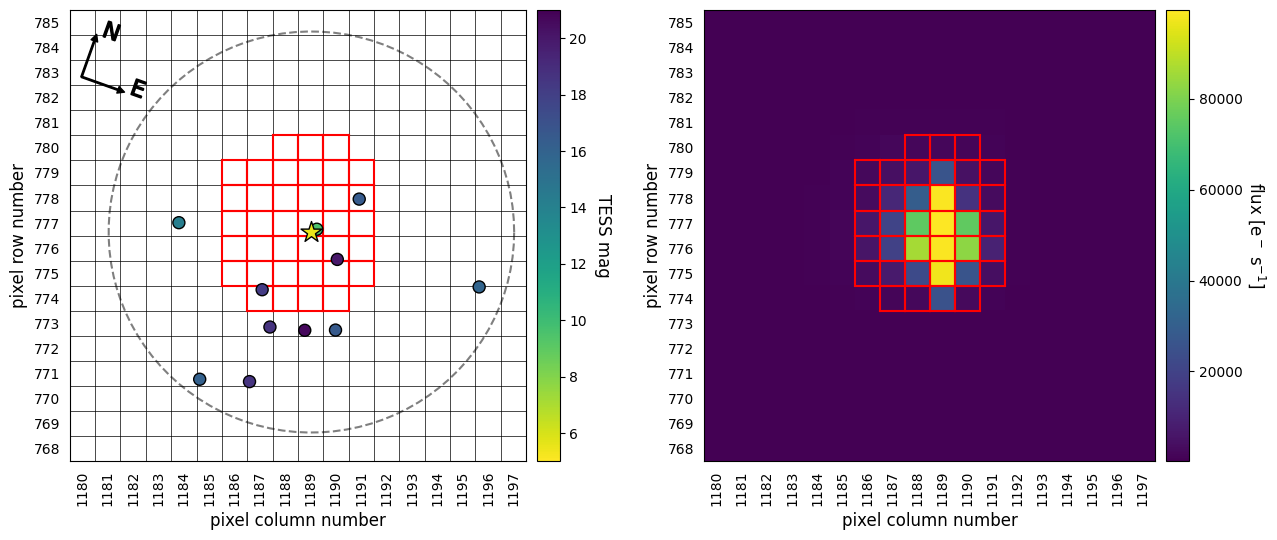

Sector 31


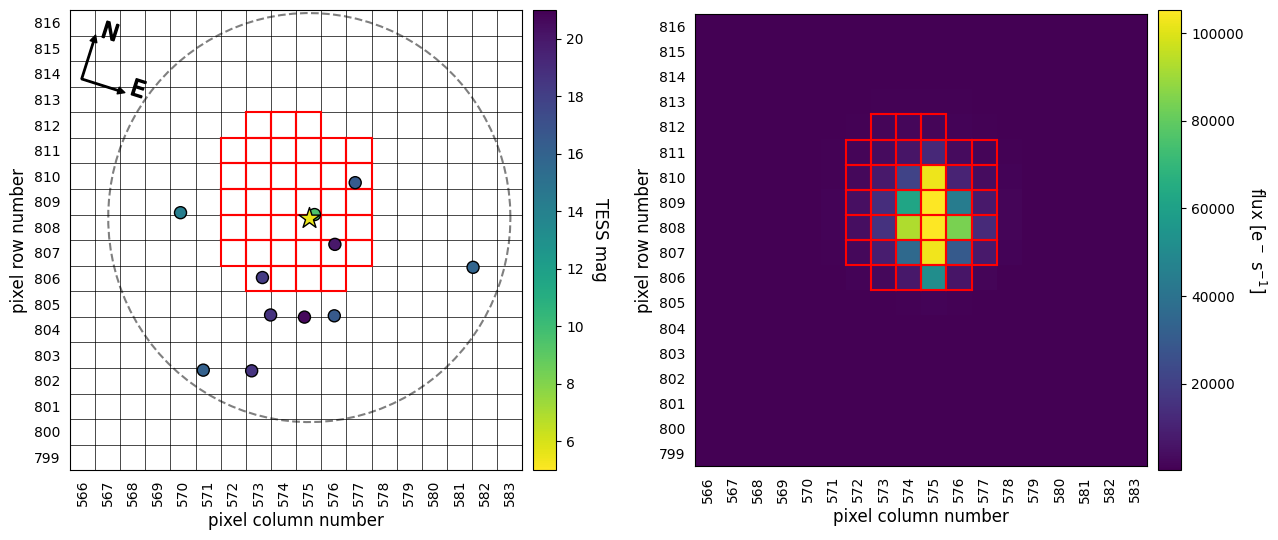

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N)
0,9967949,5.5464,4.909,4.579,4.417,50.823753,-7.794098,0.960000,2.241040,5485.0,26.940700,0.000,0.000
1,651930981,9.5132,NaN,NaN,NaN,50.824701,-7.793086,0.630000,0.731673,4048.0,26.233000,4.971,42.873
2,651930977,19.9770,NaN,NaN,NaN,50.831174,-7.797970,NaN,NaN,NaN,NaN,29.914,117.772
3,9967951,16.4543,15.289,14.565,14.599,50.831546,-7.783392,0.690000,0.584624,4431.0,1.117820,47.519,35.802
4,651930958,18.1925,NaN,NaN,NaN,50.817417,-7.810211,NaN,NaN,NaN,0.451407,62.254,201.285
5,651930956,20.6742,NaN,NaN,NaN,50.829308,-7.815624,NaN,NaN,NaN,NaN,79.988,165.658
6,9967946,16.5215,15.103,14.535,14.236,50.835801,-7.813216,0.531275,0.534689,3613.0,1.710480,81.140,148.022
7,651930957,18.6454,NaN,NaN,NaN,50.821705,-7.817593,NaN,NaN,3655.0,1.430640,84.897,184.935
8,9967948,14.2337,13.463,13.082,12.975,50.795046,-7.802264,0.980000,2.058070,5562.0,0.529547,106.525,253.979
9,651930955,18.6069,NaN,NaN,NaN,50.821248,-7.830831,NaN,NaN,NaN,0.553477,132.540,183.864


In [43]:
ap_4 = np.array([[1186.0, 775.0], [1186.0, 776.0], [1186.0, 777.0], [1186.0, 778.0],
      [1186.0, 779.0], [1187.0, 774.0], [1187.0, 775.0], [1187.0, 776.0], [1187.0,
        777.0], [1187.0, 778.0], [1187.0, 779.0], [1188.0, 774.0], [1188.0, 775.0],
      [1188.0, 776.0], [1188.0, 777.0], [1188.0, 778.0], [1188.0, 779.0], [1188.0,
        780.0], [1189.0, 774.0], [1189.0, 775.0], [1189.0, 776.0], [1189.0, 777.0],
      [1189.0, 778.0], [1189.0, 779.0], [1189.0, 780.0], [1190.0, 774.0], [1190.0,
        775.0], [1190.0, 776.0], [1190.0, 777.0], [1190.0, 778.0], [1190.0, 779.0],
      [1190.0, 780.0], [1191.0, 775.0], [1191.0, 776.0], [1191.0, 777.0], [1191.0,
        778.0], [1191.0, 779.0]])
ap_31 = np.array([[572.0, 807.0], [572.0, 808.0], [572.0, 809.0],
      [572.0, 810.0], [572.0, 811.0], [573.0, 806.0], [573.0, 807.0], [573.0, 808.0],
      [573.0, 809.0], [573.0, 810.0], [573.0, 811.0], [573.0, 812.0], [574.0, 806.0],
      [574.0, 807.0], [574.0, 808.0], [574.0, 809.0], [574.0, 810.0], [574.0, 811.0],
      [574.0, 812.0], [575.0, 806.0], [575.0, 807.0], [575.0, 808.0], [575.0, 809.0],
      [575.0, 810.0], [575.0, 811.0], [575.0, 812.0], [576.0, 806.0], [576.0, 807.0],
      [576.0, 808.0], [576.0, 809.0], [576.0, 810.0], [576.0, 811.0], [577.0, 807.0],
      [577.0, 808.0], [577.0, 809.0], [577.0, 810.0], [577.0, 811.0]])

apertures = np.array([ap_4, ap_31])

for i,(sector,aperture) in enumerate(zip(sectors,apertures)):
    print("Sector", sector)
    target.plot_field(sector=sector, ap_pixels=aperture)

target.stars

In [51]:
target.calc_depths(tdepth=0.168, all_ap_pixels=apertures)
target.stars

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N),fluxratio,tdepth
0,9967949,5.5464,4.909,4.579,4.417,50.823753,-7.794098,0.960000,2.241040,5485.0,26.940700,0.000,0.000,9.747256e-01,0.172356
1,651930981,9.5132,NaN,NaN,NaN,50.824701,-7.793086,0.630000,0.731673,4048.0,26.233000,4.971,42.873,2.522423e-02,0.000000
2,651930977,19.9770,NaN,NaN,NaN,50.831174,-7.797970,NaN,NaN,NaN,NaN,29.914,117.772,1.554853e-06,0.000000
3,9967951,16.4543,15.289,14.565,14.599,50.831546,-7.783392,0.690000,0.584624,4431.0,1.117820,47.519,35.802,3.319655e-05,0.000000
4,651930958,18.1925,NaN,NaN,NaN,50.817417,-7.810211,NaN,NaN,NaN,0.451407,62.254,201.285,6.092434e-06,0.000000
5,651930956,20.6742,NaN,NaN,NaN,50.829308,-7.815624,NaN,NaN,NaN,NaN,79.988,165.658,1.022234e-07,0.000000
6,9967946,16.5215,15.103,14.535,14.236,50.835801,-7.813216,0.531275,0.534689,3613.0,1.710480,81.140,148.022,3.822290e-06,0.000000
7,651930957,18.6454,NaN,NaN,NaN,50.821705,-7.817593,NaN,NaN,3655.0,1.430640,84.897,184.935,7.623055e-07,0.000000
8,9967948,14.2337,13.463,13.082,12.975,50.795046,-7.802264,0.980000,2.058070,5562.0,0.529547,106.525,253.979,4.618309e-06,0.000000
9,651930955,18.6069,NaN,NaN,NaN,50.821248,-7.830831,NaN,NaN,NaN,0.553477,132.540,183.864,1.625432e-10,0.000000


In [75]:
%%time

# read in the light curve
lc = pd.read_csv(f"TIC_{ID}_all_sector_lightcurve.csv", header=None)
time, flux, flux_err = lc[0].values, lc[1].values, lc[2].values
P_orb = period

lc_binsize = (time.max()-time.min())/100
lc = TessLightCurve(time=time, flux=flux, flux_err=flux_err).bin(time_bin_size=lc_binsize)

target.calc_probs(time=lc.time.value, flux_0=lc.flux.value, flux_err_0=np.mean(lc.flux_err.value), P_orb=P_orb,
                  parallel=True)

Calculating TP scenario probabilitiey for 9967949.
Calculating EB and EBx2P scenario probabilities for 9967949.
Calculating PTP scenario probability for 9967949.
Calculating PEB and PEBx2P scenario probabilities for 9967949.
Calculating STP scenario probability for 9967949.
Calculating SEB and SEBx2P scenario probabilities for 9967949.
Calculating DTP scenario probability for 9967949.
Calculating DEB and DEBx2P scenario probabilities for 9967949.
Calculating BTP scenario probability for 9967949.
Calculating BEB and BEBx2P scenario probabilities for 9967949.
CPU times: user 1min 15s, sys: 2.66 s, total: 1min 18s
Wall time: 59.4 s


In [76]:
df_results = target.probs
print("FPP =", np.round(target.FPP, 8))
print("NFPP =", np.round(target.NFPP, 8))
df_results

FPP = 1e-07
NFPP = 0.0


,ID,scenario,M_s,R_s,P_orb,inc,b,ecc,w,R_p,M_EB,R_EB,prob
0,9967949,TP,0.960000,2.241040,24.279665,89.319618,0.085091,0.547231,108.654187,3.071394,0.000000,0.000000,7.928070e-01
1,9967949,EB,0.960000,2.241040,24.279665,65.762696,1.227110,0.857643,56.592932,0.000000,0.909360,0.949733,1.591249e-313
2,9967949,EBx2P,0.960000,2.241040,48.559330,88.347312,0.385968,0.809874,194.801163,0.000000,0.919490,0.963466,2.242880e-178
3,9967949,PTP,0.960000,2.241040,24.279665,87.862265,0.341181,0.496066,145.594942,3.316533,0.000000,0.000000,1.640469e-01
4,9967949,PEB,0.960000,2.241040,24.279665,67.352809,1.214315,0.849019,57.511443,0.000000,0.906563,0.946000,1.627223e-309
5,9967949,PEBx2P,0.960000,2.241040,48.559330,88.359038,0.324388,0.839595,193.423720,0.000000,0.930798,0.979136,1.325205e-222
6,9967949,STP,0.795494,0.822758,24.279665,89.784473,0.056652,0.761211,171.716895,1.889634,0.000000,0.000000,9.999509e-08
7,9967949,SEB,0.117556,0.143825,24.279665,89.548873,1.025344,0.046208,273.753179,0.000000,0.013085,0.100000,4.046216e-281
8,9967949,SEBx2P,0.224043,0.251699,48.559330,89.542472,0.086764,0.961312,168.823534,0.000000,0.220767,0.248767,2.933884e-172
9,9967949,DTP,0.960000,2.241040,24.279665,87.816425,0.329479,0.511386,140.328468,3.246262,0.000000,0.000000,4.314594e-02


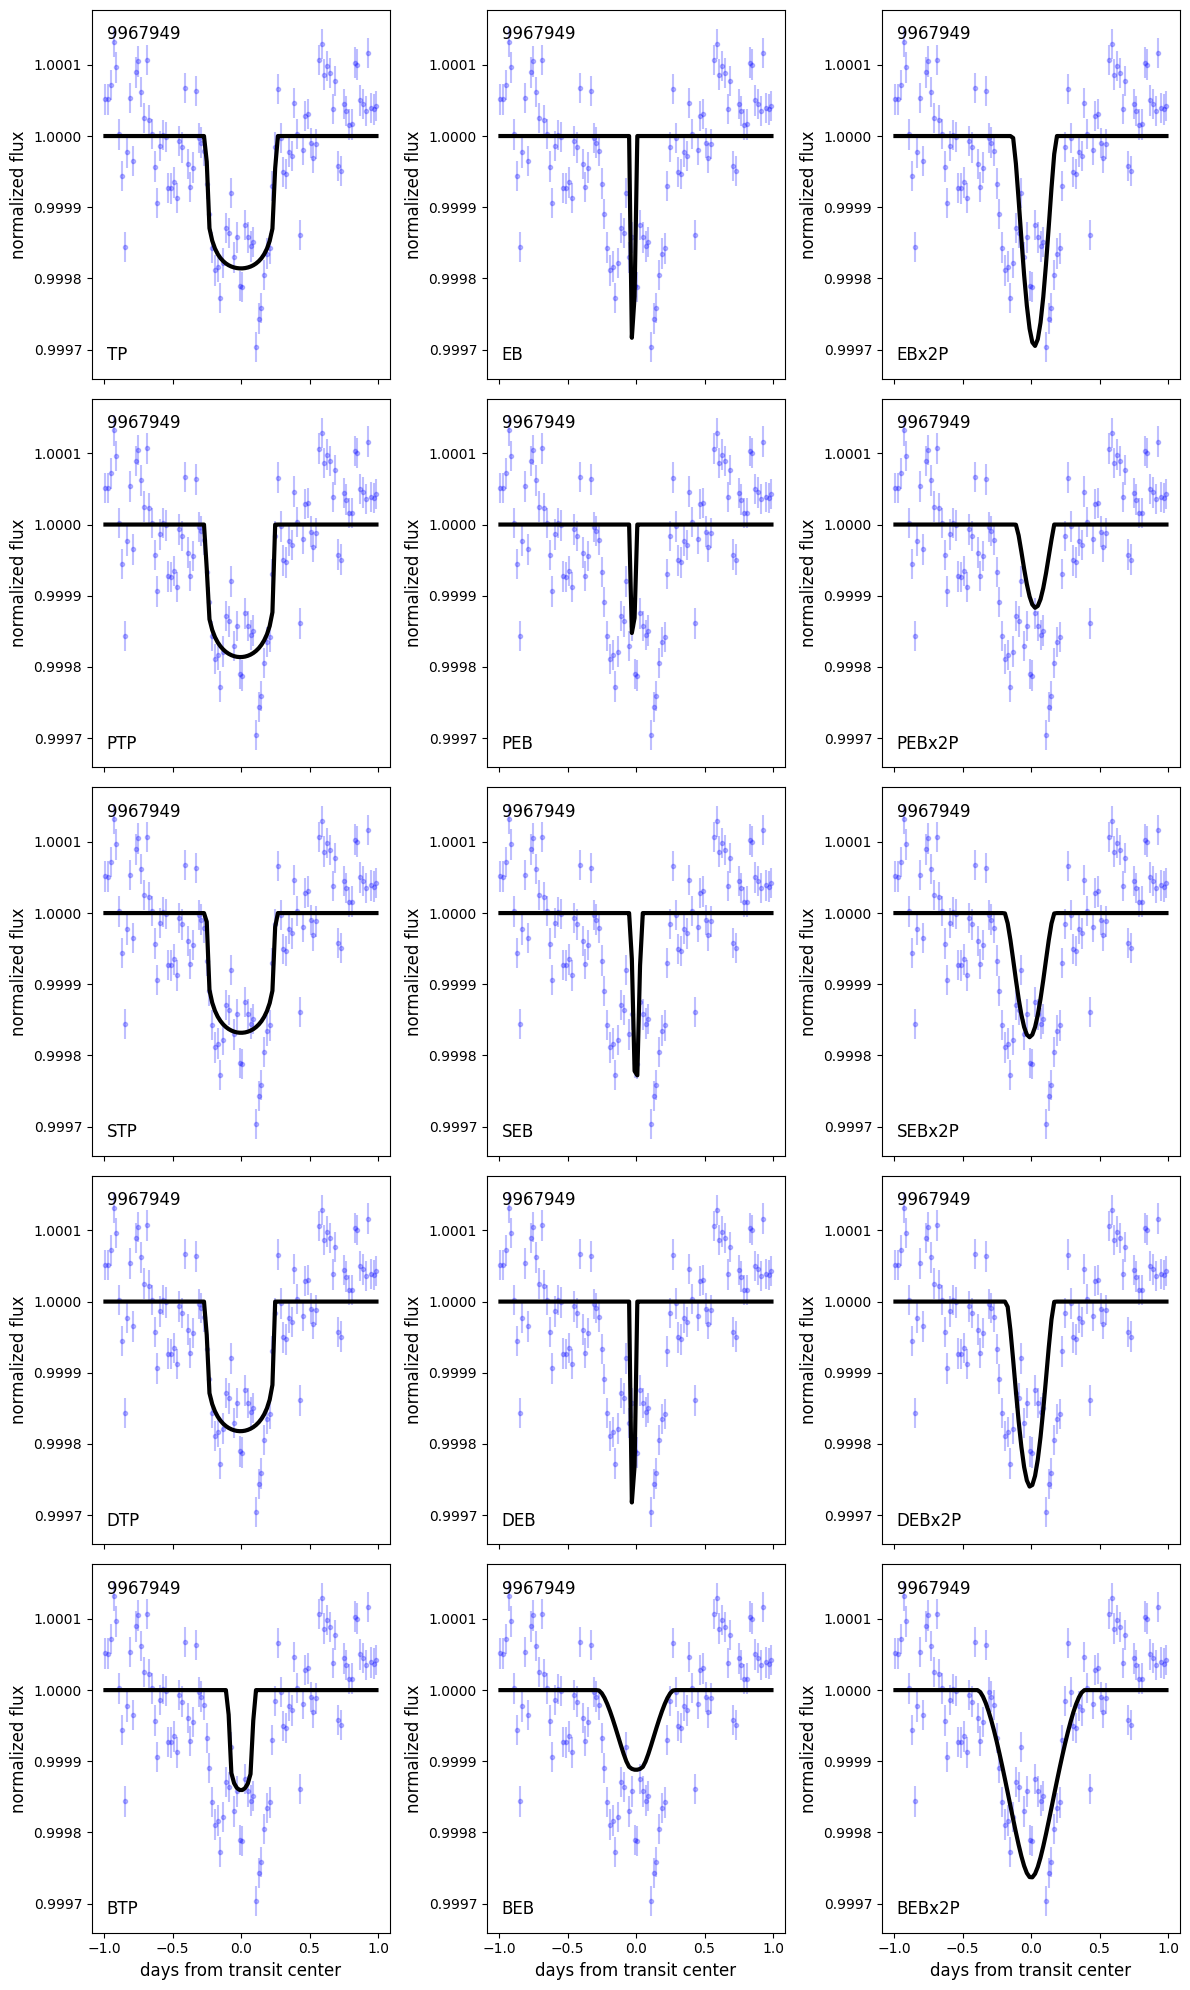

In [77]:
target.plot_fits(time=lc.time.value, flux_0=lc.flux.value, flux_err_0=np.mean(lc.flux_err.value))

In [78]:
%%time

FPPs = np.zeros(20)
NFPPs = np.zeros(20)
for i in range(20):
    target.calc_probs(time=lc.time.value,
                      flux_0=lc.flux.value,
                      flux_err_0=np.mean(lc.flux_err.value),
                      P_orb=P_orb,
                      parallel=True,
                      verbose=0)
    FPPs[i] = target.FPP
    NFPPs[i] = target.NFPP

meanFPP = np.mean(FPPs)
stdvFPP = np.std(FPPs)
print("FPP =", meanFPP, "+/-", stdvFPP)

meanNFPP = np.mean(NFPPs)
stdvNFPP = np.std(NFPPs)
print("NFPP =", meanNFPP, "+/-", stdvNFPP)

FPP = 9.115910072652888e-05 +/- 0.00037000960536824514
NFPP = 0.0 +/- 0.0
CPU times: user 24min 52s, sys: 56.3 s, total: 25min 48s
Wall time: 19min 34s


Our final conclusion about this specified planet of TIC 9967949 is that it is a planet (according to the range of FPP and NFPP set by TRICERATOPS).